## Unsupervised Learning

Unsupervised learning involves tasks that operate on datasets without labeled responses or target values.  
비지도학습은 목표하는 값,라벨,출력물이 없다.  

• Instead, the goal is to capture interesting structure or information.Applications of unsupervised learning:  
• Visualize structure of a complex dataset.  
• Density estimation to predict probabilities of events.  
• Compress and summarize the data.  
• Extract features for supervised learning.  
• Discover important clusters or outliers  

밀도추정은 특정공간에서 연속적인 가능성의 밀도를 계산, 해당 특징 공간의 이산표본세트를 생성   
밀도추정을 사용하면 어떤 주어진 특징의 조합이라도 발생할 확률을 추정할 수 있다.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import warnings
warnings.filterwarnings(action='ignore')

# Breast cancer dataset
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Our sample fruits dataset
fruits = pd.read_table('fruit_data_with_colors.txt')
X_fruits = fruits[['mass','width','height', 'color_score']]
y_fruits = fruits[['fruit_label']] - 1

### Dimensionality Reduction and Manifold Learning

Dimensionality Reduction( 차원축소 알고리즘    )   
Finds an approximate version of your dataset using fewer features    
Used for exploring and visualizing a dataset to understand grouping or relationships   
Often visualized using a 2-dimensional scatterplot Also used for compression, finding features for supervised learning    

실무에서 분석하는 데이터는 많은 특성들을 가지고 있다. 데이터를 갖고 머신러닝 알고리즘을 적용해 문제를 해결하려고 하면, 데이터 차원이 크기 때문에 학습속도가 느리고 성능 또한 좋지 않을 가능성이 크다. 그렇기 때문에 차원축소 사용

PCA(Principal Component Analysis , 주성분 분석)  
고차원의 데이터를 저차원의 데이터로 환원시키는 기법

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

# Before applying PCA, each feature should be centered (zero mean) and with unit variance
scaled_data = StandardScaler().fit(df).transform(df)

pca = PCA(n_components = 2).fit(scaled_data)
# PCA(copy=True, n_components=2, whiten=False)

# 30개의 feature를 가진 원본 데이터에서 PCA를 통해 feature 2를 가진 데이터로 변환 
x_pca = pca.transform(scaled_data)
print(df.shape, x_pca.shape)

(569, 30) (569, 2)


In [3]:
percent = pca.explained_variance_ratio_
print(percent)
print(sum(percent))

[0.44272026 0.18971182]
0.6324320765155951


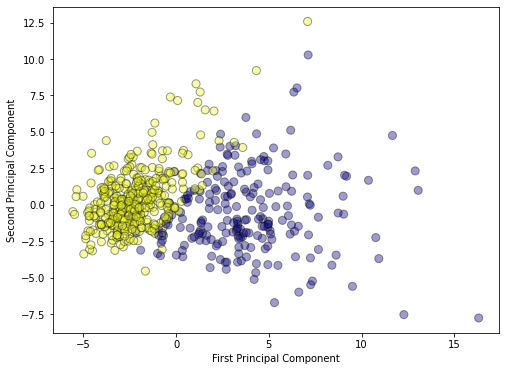

In [4]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=cancer['target'], cmap='plasma', alpha=0.4, edgecolors='black', s=65);
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

Manifold Learning (매니폴드 학습)  
고차원 공간 내의 저차원 시트를 매니폴드라고 부른다. 

In [6]:
from sklearn.manifold import MDS

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)  

mds = MDS(n_components = 2)

X_mds = mds.fit_transform(X_normalized)
X_mds

array([[-4.58672132, -9.87552398],
       [-4.87137919,  0.45394618],
       [-4.37948388, -4.27157083],
       ...,
       [-3.3393334 ,  0.81358544],
       [-5.66628125, -9.70896784],
       [ 3.60239192,  6.53866359]])

t-SNE 
데이터의 원본 고차원 데이터세트에서 포인트간 거리와 유사한 2차원 산점도에서의 거리를 가능한 맞춘 2차원 표현을 찾는다.  
t-SNE 는 이웃한 포인트들에 대한 거리 정보에 훨씬 많은 가중치를 두어 보존 

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a powerful manifold learning algorithm for visualizing clusters. It finds a two-dimensional representation of your data, such that the distances between points in the 2D scatterplot match as closely as possible the distances between the same points in the original high dimensional dataset. In particular, t-SNE gives much more weight to preserving information about distances between points that are neighbors.